In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import math
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import Dropout
#from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

%matplotlib inline

Using TensorFlow backend.


In [2]:
ec2_cpu_1 = os.getcwd() + '/ec2_cpu_1.csv'
ec2_cpu_1 = pd.read_csv(ec2_cpu_1)
ec2_cpu_1 = np.array(ec2_cpu_1)
ec2_cpu_1 = ec2_cpu_1[:,1]
ec2_cpu_1 = ec2_cpu_1.astype(np.float)

ec2_cpu_2 = os.getcwd() + '/ec2_cpu_2.csv'
ec2_cpu_2 = pd.read_csv(ec2_cpu_2)
ec2_cpu_2 = np.array(ec2_cpu_2)
ec2_cpu_2 = ec2_cpu_2[:,1]
ec2_cpu_2 = ec2_cpu_2.astype(np.float)

disease_person_1_data = os.getcwd() + '/disease_person1.csv'
disease_person1 = pd.read_csv(disease_person_1_data)
disease_person_1 = np.array(disease_person1)
disease_person_1 = disease_person_1[2:,:]
disease_person_1 = disease_person_1[:,1]
disease_person_1 = disease_person_1.astype(np.float)

max_value_disease_person_1 = max(disease_person_1)
for i in range(len(disease_person_1)):
    disease_person_1[i] = disease_person_1[i] / max_value_disease_person_1

disease_person_2_data = os.getcwd() + '/disease_person2.csv'
disease_person2 = pd.read_csv(disease_person_2_data)
disease_person_2 = np.array(disease_person2)
disease_person_2 = disease_person_2[2:,:]
disease_person_2 = disease_person_2[:,1]
disease_person_2 = disease_person_2.astype(np.float)

max_value_disease_person_2 = max(disease_person_2)
for i in range(len(disease_person_2)):
    disease_person_2[i] = disease_person_2[i] / max_value_disease_person_2

disease_person_3_data = os.getcwd() + '/disease_person3.csv'
disease_person3 = pd.read_csv(disease_person_3_data)
disease_person_3 = np.array(disease_person3)
disease_person_3 = disease_person_3[2:,:]
disease_person_3 = disease_person_3[:,1]
disease_person_3 = disease_person_3.astype(np.float)

max_value_disease_person_3 = max(disease_person_3)
for i in range(len(disease_person_3)):
    disease_person_3[i] = disease_person_3[i] / max_value_disease_person_3

healthy_person_1_data = os.getcwd() + '/healthy_person1.csv'
healthy_person1 = pd.read_csv(healthy_person_1_data)
healthy_person_1 = np.array(healthy_person1)
healthy_person_1 = healthy_person_1[2:,:]
healthy_person_1 = healthy_person_1[:,1]
healthy_person_1 = healthy_person_1.astype(np.float)

max_value_healthy_person_1 = max(healthy_person_1)
for i in range(len(healthy_person_1)):
    healthy_person_1[i] = healthy_person_1[i] / max_value_healthy_person_1

healthy_person_2_data = os.getcwd() + '/healthy_person2.csv'
healthy_person2 = pd.read_csv(healthy_person_2_data)
healthy_person_2 = np.array(healthy_person2)
healthy_person_2 = healthy_person_2[2:,:]
healthy_person_2 = healthy_person_2[:,1]
healthy_person_2 = healthy_person_2.astype(np.float)

max_value_healthy_person_2 = max(healthy_person_2)
for i in range(len(healthy_person_2)):
    healthy_person_2[i] = healthy_person_2[i] / max_value_healthy_person_2

healthy_person_3_data = os.getcwd() + '/healthy_person3.csv'
healthy_person3 = pd.read_csv(healthy_person_3_data)
healthy_person_3 = np.array(healthy_person3)
healthy_person_3 = healthy_person_3[2:,:]
healthy_person_3 = healthy_person_3[:,1]
healthy_person_3 = healthy_person_3.astype(np.float)

max_value_healthy_person_3 = max(healthy_person_3)
for i in range(len(healthy_person_3)):
    healthy_person_3[i] = healthy_person_3[i] / max_value_healthy_person_3

healthy_person_4_data = os.getcwd() + '/healthy_person4.csv'
healthy_person4 = pd.read_csv(healthy_person_4_data)
healthy_person_4 = np.array(healthy_person4)
healthy_person_4 = healthy_person_4[2:,:]
healthy_person_4 = healthy_person_4[:,1]
healthy_person_4 = healthy_person_4.astype(np.float)

max_value_healthy_person_4 = max(healthy_person_4)
for i in range(len(healthy_person_4)):
    healthy_person_4[i] = healthy_person_4[i] / max_value_healthy_person_4

In [3]:
dataset = np.append(healthy_person_1,healthy_person_1)
Dataset = 'healthy_person_1'

run = 1

In [4]:
signal_num = 2
if Dataset == 'healthy_person_1':
    signal_length = 160
    print(Dataset)
if Dataset == 'healthy_person_2':
    signal_length = 190
    print(Dataset)
if Dataset == 'healthy_person_3':
    signal_length = 130
    print(Dataset)
if Dataset == 'healthy_person_4':
    signal_length = 170
    print(Dataset)
if Dataset == 'disease_person_1':
    signal_length = 160
    print(Dataset) 
if Dataset == 'disease_person_2':
    signal_length = 160
    print(Dataset) 
if Dataset == 'disease_person_3':
    signal_length = 148
    print(Dataset)
if Dataset == 'Sine wave':
    signal_length = 21
    print(Dataset)
if Dataset == 'cpu_1':
    signal_length = 150
    print(Dataset)
if Dataset == 'cpu_2':
    signal_length = 10
    print(Dataset)

healthy_person_1


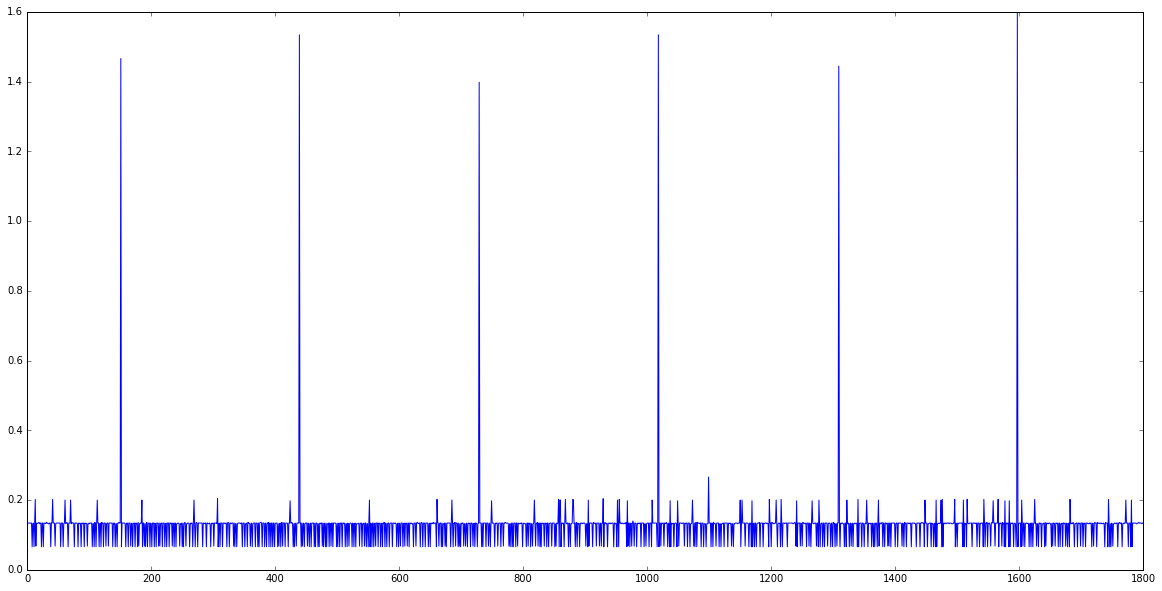

In [5]:
plt.figure(figsize=(20,10))
plt.plot(ec2_cpu_1[:150*12])
plt.show()

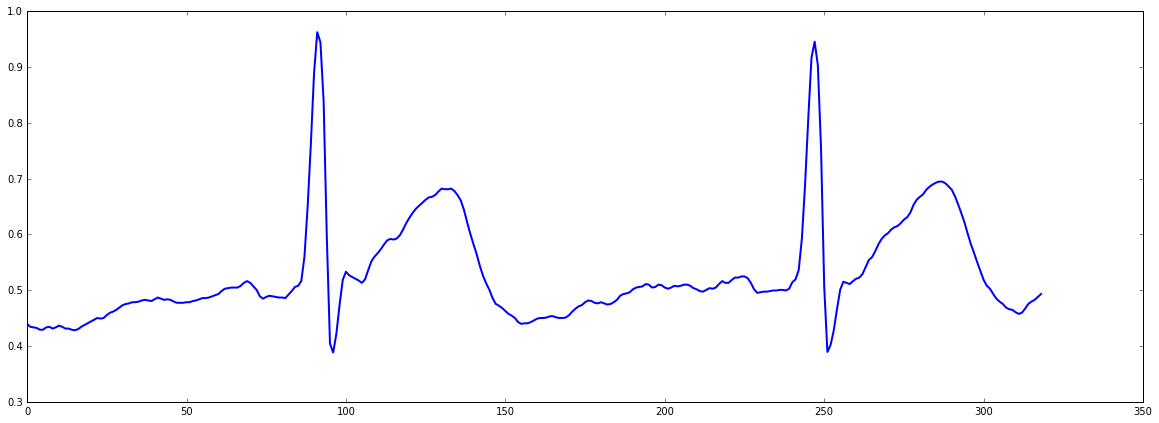

In [6]:
plt.figure(figsize=(20,7))
plt.plot(dataset[:2*signal_length-1], linewidth=2)
plt.show()

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

look_back = 5

K = 3

In [8]:
import shutil
def remove_folder(path):
    # check if folder exists
    if os.path.exists(path):
         # remove if exists
         shutil.rmtree(path)
remove_folder('./ALICE_BANDIT/'+str(Dataset)+'/RUN'+str(run))

In [39]:
# create the networks
# create and fit the network
model_1 = Sequential()
model_1.add(Dense(10, input_dim=look_back, activation='relu', name='dense_1_offline'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1))
#model_1.compile(loss='mean_squared_error', optimizer='adam')

model_2 = Sequential()
model_2.add(Dense(10, input_dim=look_back, activation='relu', name='dense_2_offline'))
model_2.add(Dense(100, activation='relu'))
#model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))
#model_2.compile(loss='mean_squared_error', optimizer='adam')

model_3 = Sequential()
model_3.add(Dense(10, input_dim=look_back, activation='relu', name='dense_3_offline'))
for _ in range(50):
    model_3.add(Dense(3, activation='relu'))
model_3.add(Dense(1))
#model_3.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model_10 = model_11 = model_12 = model_1
model_20 = model_21 = model_22 = model_2
model_30 = model_31 = model_32 = model_3
model_11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_offline (Dense)      (None, 10)                60        
_________________________________________________________________
dense_60 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_61 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_62 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_63 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_64 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 21        
Total para

In [41]:
BanditFolder = './ALICE_BANDIT/'+str(Dataset)+'/RUN'+str(run)
if not os.path.exists(BanditFolder):
    os.makedirs(BanditFolder)
model_10.save_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5')
model_11.save_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5')
model_12.save_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5')
model_20.save_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5')
model_21.save_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5')
model_22.save_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5')
model_30.save_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5')
model_31.save_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5')
model_32.save_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5')

In [42]:
History_train = History_train_1 = History_train_2 = History_train_3 = np.array([])
History_validate = History_validate_1 = History_validate_2 = History_validate_3 = np.array([])
Predictions = np.array([])
Predictions_offline = np.array([])
DTW = np.array([])
Correlation = np.array([])
iters = len(dataset) / (signal_num*signal_length)
iters

54

In [43]:
T = 3
count_1 = 0
count_2 = 0
count_3 = 0
gamma = 0.4

In [44]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

weights = np.ones(K)
P = weights / K
Probs = np.zeros([T,K])
Weights = np.zeros([T,K])
Arms = np.array([])
D = 3

In [45]:
T = 3

In [46]:
for t in range(T):
    print 'Iteration: %.1d' % (t), '----------------------------------------'
    context = dataset[t*signal_num*signal_length:(t+1)*signal_num*signal_length]
    test_size = signal_length
    train_size = signal_length
    train, test = context[:len(context)], context[:len(context)]
    validation_split = 0.5
    #reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    OnlineFolder = BanditFolder+'/Action_1'+'/'
    if not os.path.exists(OnlineFolder):
        os.makedirs(OnlineFolder)   
    
    if count_1 == 0:
        model_10.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
    else:
        model_10.load_weights(OnlineFolder+'weights'+str(count_1-1)+'.h5', by_name=True)
    model_10.compile(loss='mean_squared_error', optimizer='adam')
    history_10 = model_10.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
    testPredict = model_10.predict(testX)
    History_train_1 = np.append(History_train_1, history_10.history['loss'])
    History_validate_1 = np.append(History_validate_1, history_10.history['val_loss'])
    model_10.save_weights(OnlineFolder+'weights'+str(count_1)+'.h5')
    count_1 = count_1 + 1
    
    if count_2 == 0:
        model_20.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
    else:
        model_20.load_weights(OnlineFolder+'weights'+str(count_2-1)+'.h5', by_name=True)
    model_20.compile(loss='mean_squared_error', optimizer='adam')
    history_20 = model_20.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
    testPredict = model_20.predict(testX)
    History_train_2 = np.append(History_train_2, history_20.history['loss'])
    History_validate_2 = np.append(History_validate_2, history_20.history['val_loss'])
    model_20.save_weights(OnlineFolder+'weights'+str(count_2)+'.h5')
    count_2 = count_2 + 1
    
    if count_3 == 0:
        model_30.load_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5', by_name=True)
    else:
        model_30.load_weights(OnlineFolder+'weights'+str(count_3-1)+'.h5')
    model_30.compile(loss='mean_squared_error', optimizer='adam')
    history_30 = model_30.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
    testPredict = model_30.predict(testX)
    History_train_3 = np.append(History_train_3, history_30.history['loss'])
    History_validate_3 = np.append(History_validate_3, history_30.history['val_loss'])
    model_30.save_weights(OnlineFolder+'weights'+str(count_3)+'.h5')
    count_3 = count_3 + 1
    
Arm_1 = np.cumsum(History_validate_1)
Arm_2 = np.cumsum(History_validate_2)
Arm_3 = np.cumsum(History_validate_3)

print 'Reject:'
if max(Arm_1[-1],Arm_2[-1],Arm_3[-1]) == Arm_1[-1]:
    print 'Arm 1'
    n = 1
elif max(Arm_1[-1],Arm_2[-1],Arm_3[-1]) == Arm_2[-1]:
    print 'Arm 2'
    n = 2
elif max(Arm_1[-1],Arm_2[-1],Arm_3[-1]) == Arm_3[-1]:
    print 'Arm_3'
    n = 3

Iteration: 0 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.0174 - val_loss: 0.0043
Train on 157 samples, validate on 157 samples
Epoch 1/1
2s - loss: 0.0430 - val_loss: 0.0048
Train on 157 samples, validate on 157 samples
Epoch 1/1
5s - loss: 0.2133 - val_loss: 0.1619
Iteration: 1 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.0041 - val_loss: 0.0038
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.0037 - val_loss: 0.0038
Train on 157 samples, validate on 157 samples
Epoch 1/1
7s - loss: 0.1125 - val_loss: 0.0701
Iteration: 2 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.0046 - val_loss: 0.0034
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.0041 - val_loss: 0.0033
Train on 157 samples, validate on 157 samples
Epoch 1/1
5s - loss: 0.0372 - val_loss: 0.0245
R

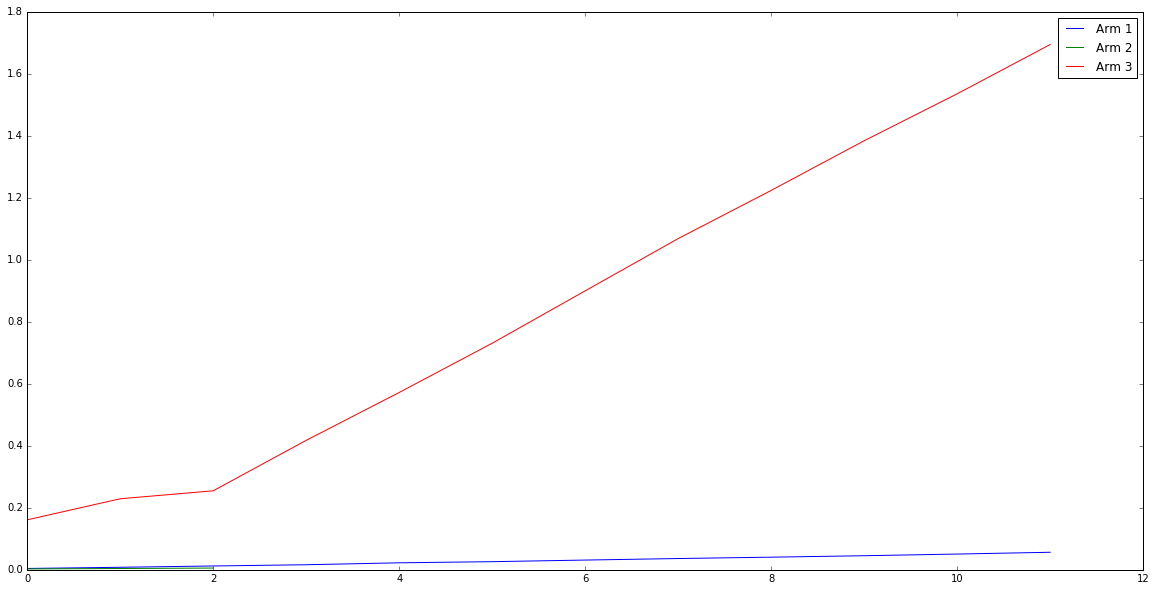

In [36]:
plt.figure(figsize=(20,10))
plt.plot(Arm_1)
plt.plot(Arm_2)
plt.plot(Arm_3)
plt.legend(['Arm 1', 'Arm 2', 'Arm 3'])
plt.show()

In [25]:
n

2

In [26]:
for t in range(3,12):
    print 'Iteration: %.1d' % (t), '----------------------------------------'
    context = dataset[t*signal_num*signal_length:(t+1)*signal_num*signal_length]
    test_size = signal_length
    train_size = signal_length
    train, test = context[:len(context)], context[:len(context)]
    validation_split = 0.5
    #reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    if n == 1:
        #model_10.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
        #model_10.compile(loss='mean_squared_error', optimizer='adam')
        #history_10 = model_10.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        #testPredict = model_10.predict(testX)
        #History_train_1 = np.append(History_train_1, history_10.history['loss'])
        #History_validate_1 = np.append(History_validate_1, history_10.history['val_loss'])
        #model_10.save_weights(OnlineFolder+'weights'+str(count_1)+'.h5')
        #count_1 = count_1 + 1
    
        model_20.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
        model_20.compile(loss='mean_squared_error', optimizer='adam')
        history_20 = model_20.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_20.predict(testX)
        History_train_2 = np.append(History_train_2, history_20.history['loss'])
        History_validate_2 = np.append(History_validate_2, history_20.history['val_loss'])
        model_20.save_weights(OnlineFolder+'weights'+str(count_2)+'.h5')
        count_2 = count_2 + 1
    
        model_30.load_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5', by_name=True)
        model_30.compile(loss='mean_squared_error', optimizer='adam')
        history_30 = model_30.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_30.predict(testX)
        History_train_3 = np.append(History_train_3, history_30.history['loss'])
        History_validate_3 = np.append(History_validate_3, history_30.history['val_loss'])
        model_30.save_weights(OnlineFolder+'weights'+str(count_3)+'.h5')
        count_3 = count_3 + 1
        
        #Arm_1 = np.cumsum(History_validate_1)
        Arm_2 = np.cumsum(History_validate_2)
        Arm_3 = np.cumsum(History_validate_3)
    
    if n == 2:
        model_10.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
        model_10.compile(loss='mean_squared_error', optimizer='adam')
        history_10 = model_10.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_10.predict(testX)
        History_train_1 = np.append(History_train_1, history_10.history['loss'])
        History_validate_1 = np.append(History_validate_1, history_10.history['val_loss'])
        model_10.save_weights(OnlineFolder+'weights'+str(count_1)+'.h5')
        count_1 = count_1 + 1
    
        #model_20.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
        #model_20.compile(loss='mean_squared_error', optimizer='adam')
        #history_20 = model_20.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        #testPredict = model_20.predict(testX)
        #History_train_2 = np.append(History_train_2, history_20.history['loss'])
        #History_validate_2 = np.append(History_validate_2, history_20.history['val_loss'])
        #model_20.save_weights(OnlineFolder+'weights'+str(count_2)+'.h5')
        #count_2 = count_2 + 1
    
        model_30.load_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5', by_name=True)
        model_30.compile(loss='mean_squared_error', optimizer='adam')
        history_30 = model_30.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_30.predict(testX)
        History_train_3 = np.append(History_train_3, history_30.history['loss'])
        History_validate_3 = np.append(History_validate_3, history_30.history['val_loss'])
        model_30.save_weights(OnlineFolder+'weights'+str(count_3)+'.h5')
        count_3 = count_3 + 1
        
        Arm_1 = np.cumsum(History_validate_1)
        #Arm_2 = np.cumsum(History_validate_2)
        Arm_3 = np.cumsum(History_validate_3)
    
    if n == 3:
        model_10.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
        model_10.compile(loss='mean_squared_error', optimizer='adam')
        history_10 = model_10.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_10.predict(testX)
        History_train_1 = np.append(History_train_1, history_10.history['loss'])
        History_validate_1 = np.append(History_validate_1, history_10.history['val_loss'])
        model_10.save_weights(OnlineFolder+'weights'+str(count_1)+'.h5')
        count_1 = count_1 + 1
    
        model_20.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
        model_20.compile(loss='mean_squared_error', optimizer='adam')
        history_20 = model_20.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        testPredict = model_20.predict(testX)
        History_train_2 = np.append(History_train_2, history_20.history['loss'])
        History_validate_2 = np.append(History_validate_2, history_20.history['val_loss'])
        model_20.save_weights(OnlineFolder+'weights'+str(count_2)+'.h5')
        count_2 = count_2 + 1
    
        #model_30.load_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5', by_name=True)
        #model_30.compile(loss='mean_squared_error', optimizer='adam')
        #history_30 = model_30.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        #testPredict = model_30.predict(testX)
        #History_train_3 = np.append(History_train_3, history_30.history['loss'])
        #History_validate_3 = np.append(History_validate_3, history_30.history['val_loss'])
        #model_30.save_weights(OnlineFolder+'weights'+str(count_3)+'.h5')
        #count_3 = count_3 + 1

        Arm_1 = np.cumsum(History_validate_1)
        Arm_2 = np.cumsum(History_validate_2)
        #Arm_3 = np.cumsum(History_validate_3)

Iteration: 3 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
1s - loss: 0.1073 - val_loss: 0.0040
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.2221 - val_loss: 0.1628
Iteration: 4 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
1s - loss: 0.1157 - val_loss: 0.0062
Train on 157 samples, validate on 157 samples
Epoch 1/1
3s - loss: 0.2194 - val_loss: 0.1544
Iteration: 5 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
1s - loss: 0.1166 - val_loss: 0.0037
Train on 157 samples, validate on 157 samples
Epoch 1/1
4s - loss: 0.2195 - val_loss: 0.1588
Iteration: 6 ----------------------------------------
Train on 157 samples, validate on 157 samples
Epoch 1/1
1s - loss: 0.0813 - val_loss: 0.0052
Train on 157 samples, validate on 157 samples
Epoch 1/1
4s - loss: 0.1949 - val_loss: 0.1690
Iteration: 7 ---------------------------

In [ ]:
for t in range(T):
    print 'Iteration: %.1d' % (t), '----------------------------------------'
    context = dataset[t*signal_num*signal_length:(t+1)*signal_num*signal_length]
    test_size = signal_length
    train_size = signal_length
    train, test = context[:len(context)], context[:len(context)]
    validation_split = 0.5
    #reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    p = np.random.uniform(0,sum(P))

    if p >= 0 and p < P[0]:
        print p
        print('ARM 1')
        arm = 1
        Arms = np.append(Arms,arm)
        OnlineFolder = BanditFolder+'/Action_1'+'/'
        if not os.path.exists(OnlineFolder):
            os.makedirs(OnlineFolder)   
        if count_1 == 0:
            model_10.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
            model_11.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
            model_12.load_weights(BanditFolder+'/'+str(model_1)+str(Dataset)+'.h5', by_name=True)
        else:
            model_10.load_weights(OnlineFolder+'weights'+str(count_1-1)+'.h5', by_name=True)
            model_11.load_weights(OnlineFolder+'weights'+str(count_1-1)+'.h5', by_name=True)
            model_12.load_weights(OnlineFolder+'weights'+str(count_1-1)+'.h5', by_name=True)
        model_10.compile(loss='mean_squared_error', optimizer='adam')
        history_10 = model_10.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_11.compile(loss='mean_squared_error', optimizer='adam')
        history_11 = model_11.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_12.compile(loss='mean_squared_error', optimizer='adam')
        history_12 = model_11.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        if history_10.history['val_loss'][0] == min(history_10.history['val_loss'][0],history_11.history['val_loss'][0],history_12.history['val_loss'][0]):
            model_1 = model_10
            history_1 = history_10
        elif history_11.history['val_loss'][0] == min(history_10.history['val_loss'][0],history_11.history['val_loss'][0],history_12.history['val_loss'][0]):
            model_1 = model_11
            history_1 = history_11
        elif history_12.history['val_loss'][0] == min(history_10.history['val_loss'][0],history_11.history['val_loss'][0],history_12.history['val_loss'][0]):
            model_1 = model_12
            history_1 = history_12
        model_1.save_weights(OnlineFolder+'weights'+str(count_1)+'.h5')
        count_1 = count_1 + 1
        reward1 = history_1.history['val_loss']
        reward1 = 1 - reward1[0]
        reward1_est = reward1/P[0]
        weights[0] = weights[0]*np.exp((gamma/np.float(K))*reward1_est)
        if weights[0] > 99999:
            weights[0] = 99999
        P[0] = (1-gamma)*(weights[0] / sum(weights))+(gamma)/np.float(K)
        P[1] = (1-gamma)*(weights[1] / sum(weights))+(gamma)/np.float(K)
        P[2] = (1-gamma)*(weights[2] / sum(weights))+(gamma)/np.float(K)
        #if t < 3:
        #    P[:] = 1 / np.float(K)
        Weights[t,:] = weights
        Probs[t,:] = P
        print P
        testPredict = model_1.predict(testX)
        History_train = np.append(History_train, history_1.history['loss'])
        History_validate = np.append(History_validate, history_1.history['val_loss'])
        Predictions = np.append(Predictions,testPredict)
        distance, path = fastdtw(testPredict,testX[:,look_back-1], dist=euclidean)
        DTW = np.append(DTW,distance)
        corr = np.correlate(testX[:,look_back-1],testPredict[:,0])
        Correlation = np.append(Correlation,corr)
        print("Saving model...")
        model_1.save(OnlineFolder+'model_1_'+str(count_1)+'.h5')
        del model_1
        print("Model saved to disk.")
        model_1 = load_model(OnlineFolder+'model_1_'+str(count_1)+'.h5')
    elif p >= P[0] and p < (P[0] + P[1]):
        print p
        print('ARM 2')
        arm = 2
        Arms = np.append(Arms,arm)
        OnlineFolder = BanditFolder+'/Action_2'+'/'
        if not os.path.exists(OnlineFolder):
            os.makedirs(OnlineFolder)   
        if count_2 == 0:
            model_20.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
            model_21.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
            model_22.load_weights(BanditFolder+'/'+str(model_2)+str(Dataset)+'.h5', by_name=True)
        else:
            model_20.load_weights(OnlineFolder+'weights'+str(count_2-1)+'.h5', by_name=True)
            model_21.load_weights(OnlineFolder+'weights'+str(count_2-1)+'.h5', by_name=True)
            model_22.load_weights(OnlineFolder+'weights'+str(count_2-1)+'.h5', by_name=True)
        model_20.compile(loss='mean_squared_error', optimizer='adam')
        history_20 = model_20.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_21.compile(loss='mean_squared_error', optimizer='adam')
        history_21 = model_21.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_22.compile(loss='mean_squared_error', optimizer='adam')
        history_22 = model_22.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        if history_20.history['val_loss'][0] == min(history_20.history['val_loss'][0],history_21.history['val_loss'][0],history_22.history['val_loss'][0]):
            model_2 = model_20
            history_2 = history_20
        elif history_21.history['val_loss'][0] == min(history_20.history['val_loss'][0],history_21.history['val_loss'][0],history_22.history['val_loss'][0]):
            model_2 = model_21
            history_2 = history_21
        elif history_22.history['val_loss'][0] == min(history_20.history['val_loss'][0],history_21.history['val_loss'][0],history_22.history['val_loss'][0]):
            model_2 = model_22
            history_2 = history_22
        model_2.save_weights(OnlineFolder+'weights'+str(count_2)+'.h5')
        count_2 = count_2 + 1
        reward2 = history_2.history['val_loss']
        reward2 = 1 - reward2[0]
        reward2_est = reward2/P[1]
        weights[1] = weights[1]*np.exp((gamma/np.float(K))*reward2_est)
        if weights[1] > 99999:
            weights[1] = 99999
        P[0] = (1-gamma)*(weights[0] / sum(weights))+(gamma)/np.float(K)
        P[1] = (1-gamma)*(weights[1] / sum(weights))+(gamma)/np.float(K)
        P[2] = (1-gamma)*(weights[2] / sum(weights))+(gamma)/np.float(K)
        #if t < 3:
        #    P[:] = 1 / np.float(K)
        Probs[t,:] = P
        Weights[t,:] = weights
        print P
        testPredict = model_2.predict(testX)
        History_train = np.append(History_train, history_2.history['loss'])
        History_validate = np.append(History_validate, history_2.history['val_loss'])
        Predictions = np.append(Predictions,testPredict)
        distance, path = fastdtw(testPredict,testX[:,look_back-1], dist=euclidean)
        DTW = np.append(DTW,distance)
        corr = np.correlate(testX[:,look_back-1],testPredict[:,0])
        Correlation = np.append(Correlation,corr)
        print("Saving model...")
        model_2.save(OnlineFolder+'model_2_'+str(count_2)+'.h5')
        del model_2
        print("Model saved to disk.")
        model_2 = load_model(OnlineFolder+'model_2_'+str(count_2)+'.h5')
    elif p >= (P[1] + P[2]) and p <= 1:
        print p
        print('ARM 3')
        arm = 3
        Arms = np.append(Arms,arm)
        OnlineFolder = BanditFolder+'/Action_3'+'/'
        if not os.path.exists(OnlineFolder):
            os.makedirs(OnlineFolder)   
        if count_3 == 0:
            model_3.load_weights(BanditFolder+'/'+str(model_3)+str(Dataset)+'.h5', by_name=True)
        else:
            model_3.load_weights(OnlineFolder+'weights'+str(count_3-1)+'.h5', by_name=True)
        model_30.compile(loss='mean_squared_error', optimizer='adam')
        history_30 = model_30.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_31.compile(loss='mean_squared_error', optimizer='adam')
        history_31 = model_31.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        model_32.compile(loss='mean_squared_error', optimizer='adam')
        history_32 = model_32.fit(trainX, trainY, validation_split=validation_split, epochs=1, batch_size=1, verbose=2)
        if history_30.history['val_loss'][0] == min(history_30.history['val_loss'][0],history_31.history['val_loss'][0],history_32.history['val_loss'][0]):
            model_3 = model_30
            history_3 = history_30
        elif history_31.history['val_loss'][0] == min(history_30.history['val_loss'][0],history_31.history['val_loss'][0],history_32.history['val_loss'][0]):
            model_3 = model_31
            history_3 = history_31
        elif history_32.history['val_loss'][0] == min(history_30.history['val_loss'][0],history_31.history['val_loss'][0],history_32.history['val_loss'][0]):
            model_3 = model_32
            history_3 = history_32
        model_3.save_weights(OnlineFolder+'weights'+str(count_3)+'.h5')
        count_3 = count_3 + 1
        reward3 = history_3.history['val_loss']
        reward3 = 1 - reward3[0]
        reward3_est = reward3/P[2]
        weights[2] = weights[2]*np.exp((gamma/np.float(K))*reward3_est)
        if weights[2] > 99999:
            weights[2] = 99999
        P[0] = (1-gamma)*(weights[0] / sum(weights))+(gamma)/np.float(K)
        P[1] = (1-gamma)*(weights[1] / sum(weights))+(gamma)/np.float(K)
        P[2] = (1-gamma)*(weights[2] / sum(weights))+(gamma)/np.float(K)
        #if t < 3:
        #   P[:] = 1 / np.float(K)
        Probs[t,:] = P
        Weights[t,:] = weights
        print P
        testPredict = model_3.predict(testX)
        History_train = np.append(History_train, history_3.history['loss'])
        History_validate = np.append(History_validate, history_3.history['val_loss'])
        Predictions = np.append(Predictions,testPredict)
        distance, path = fastdtw(testPredict,testX[:,look_back-1], dist=euclidean)
        DTW = np.append(DTW,distance)
        corr = np.correlate(testX[:,look_back-1],testPredict[:,0])
        Correlation = np.append(Correlation,corr)
        print("Saving model...")
        model_3.save(OnlineFolder+'model_3_'+str(count_3)+'.h5')
        del model_3
        print("Model saved to disk.")
        model_3 = load_model(OnlineFolder+'model_3_'+str(count_3)+'.h5')

Iteration: 0 ----------------------------------------
0.529127396951
ARM 2
Train on 157 samples, validate on 157 samples
Epoch 1/1
19s - loss: 0.0353 - val_loss: 0.0074
Train on 157 samples, validate on 157 samples
Epoch 1/1
10s - loss: 0.0071 - val_loss: 0.0052
Train on 157 samples, validate on 157 samples
Epoch 1/1
9s - loss: 0.0066 - val_loss: 0.0043
[ 0.30528818  0.38942363  0.30528818]
Saving model...
Model saved to disk.
Iteration: 1 ----------------------------------------
0.226032851232
ARM 1
Train on 157 samples, validate on 157 samples
Epoch 1/1
10s - loss: 0.0090 - val_loss: 0.0051
Train on 157 samples, validate on 157 samples
Epoch 1/1
9s - loss: 0.0049 - val_loss: 0.0042
Train on 157 samples, validate on 157 samples
Epoch 1/1
9s - loss: 0.0043 - val_loss: 0.0042
[ 0.36309888  0.35483672  0.28206439]
Saving model...
Model saved to disk.
Iteration: 2 ----------------------------------------
0.800941217793
ARM 3
Train on 157 samples, validate on 157 samples
Epoch 1/1
14s - lo

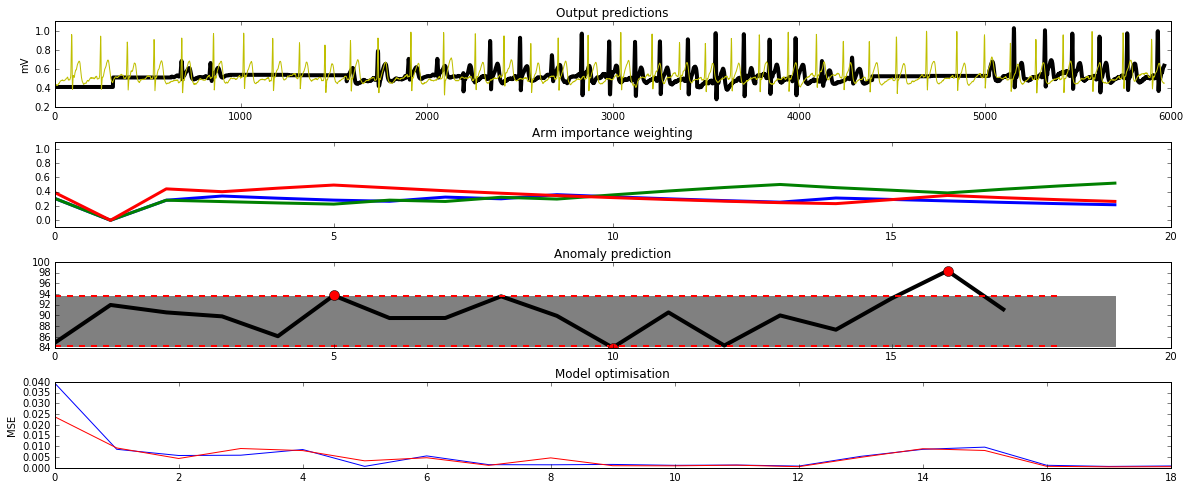

In [30]:
f, ax = plt.subplots(4, 1, figsize=(20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.4)

Anomalies = np.zeros(len(Correlation))
Anomalies[:] = np.nan
x = np.linspace(0, len(Correlation), num=len(Correlation))
Avg = np.zeros(len(Correlation))
Upper = np.zeros(len(Correlation))
Lower = np.zeros(len(Correlation))
Avg[:] = np.median(Correlation)
Upper[:] = np.percentile(Correlation, 90)
Lower[:] = np.percentile(Correlation, 10)
for i in range(len(Correlation)):
    if Correlation[i]<Lower[i] or Correlation[i]>Upper[i]:
        Anomalies[i] = Correlation[i]

buffers = np.zeros(signal_num*signal_length)
buffers[:] = np.nan
dataset1 = np.append(buffers,dataset)
Predictions1 = np.append(buffers,Predictions)
ax[0].plot(Predictions, 'k', linewidth=4)
ax[0].plot(dataset[:len(Predictions)], 'y')
ax[0].set_ylabel('mV')
ax[0].set_title('Output predictions')

#for i in range(2):
#    Probs[i,:] = softmax(Weights[i,:])
ax[1].plot(Probs, linewidth=3)
ax[1].set_title('Arm importance weighting')
ax[1].set_ylim([-0.1,1.1])

ax[2].plot(Correlation[1:], 'k', linewidth=4)
ax[2].plot(Upper, 'r--', linewidth=2)
ax[2].plot(Lower, 'r--', linewidth=2)
ax[2].fill_between(x,Upper,Lower, color='grey')
ax[2].plot(Anomalies[1:], 'ro', markersize=10)
ax[2].set_title('Anomaly prediction')

ax[3].plot(History_train, 'b')
ax[3].plot(History_validate, 'r')
ax[3].set_ylabel('MSE')
ax[3].set_title('Model optimisation')

plt.savefig(BanditFolder+'/Results_1.png')

In [5]:
DLB_1 = [ 0.0235055 ,  0.03147009,  0.03362152,  0.03482956,  0.03617189,
        0.03728803,  0.03804365,  0.03871391,  0.03934296,  0.03984735,
        0.04028925,  0.04060312,  0.04097584,  0.04552938,  0.04886702,
        0.04919492,  0.04936668,  0.0516508 ]

In [11]:
np.savetxt('DLB_1', DLB_1, delimiter=',')

In [6]:
EXP3_1 = [ 0.00251631,  0.02217535,  0.02359816,  0.0245206 ,  0.03349928,
        0.03497555,  0.03706789,  0.04562455,  0.04678922,  0.05656245,
        0.05734884,  0.05860791,  0.05953668,  0.06009822,  0.06081692,
        0.06132682,  0.06177666,  0.06252863,  0.06337401,  0.06376965]

In [7]:
EXP3_2 = [ 0.00188304,  0.00502382,  0.02906831,  0.03081508,  0.03310659,
        0.03461051,  0.03644006,  0.0380546 ,  0.03944446,  0.04104754,
        0.04340222,  0.04451171,  0.05290713,  0.05375369,  0.05478748,
        0.05616413,  0.05787843,  0.05865987,  0.05927408,  0.06003746]

In [8]:
EXP3_3 = [ 0.00102376,  0.00283866,  0.0260643 ,  0.02696439,  0.02798793,
        0.02860552,  0.02998325,  0.03093672,  0.03151589,  0.03211762,
        0.03266205,  0.03302666,  0.03344358,  0.03366809,  0.03392815,
        0.03412335,  0.03444595,  0.03460635,  0.03471895,  0.03543386]

In [9]:
EXP3_4 = [ 0.02378884,  0.03304009,  0.03737799,  0.04636814,  0.05438806,
        0.05763002,  0.06231955,  0.06346267,  0.06808412,  0.06906329,
        0.06998432,  0.07121085,  0.07173386,  0.07660816,  0.08548503,
        0.09355606,  0.09424122,  0.09468413,  0.09519435]

In [30]:
np.savetxt('EXP3_1', EXP3_1, delimiter=',')
np.savetxt('EXP3_2', EXP3_2, delimiter=',')
np.savetxt('EXP3_3', EXP3_3, delimiter=',')
np.savetxt('EXP3_4', EXP3_4, delimiter=',')

In [28]:
np.shape(np.vstack((EXP3_1,EXP3_2)))

(2, 20)

In [31]:
np.loadtxt('EXP3_1')

array([ 0.00251631,  0.02217535,  0.02359816,  0.0245206 ,  0.03349928,
        0.03497555,  0.03706789,  0.04562455,  0.04678922,  0.05656245,
        0.05734884,  0.05860791,  0.05953668,  0.06009822,  0.06081692,
        0.06132682,  0.06177666,  0.06252863,  0.06337401,  0.06376965])

In [19]:
np.cumsum(History_validate)

NameError: name 'History_validate' is not defined

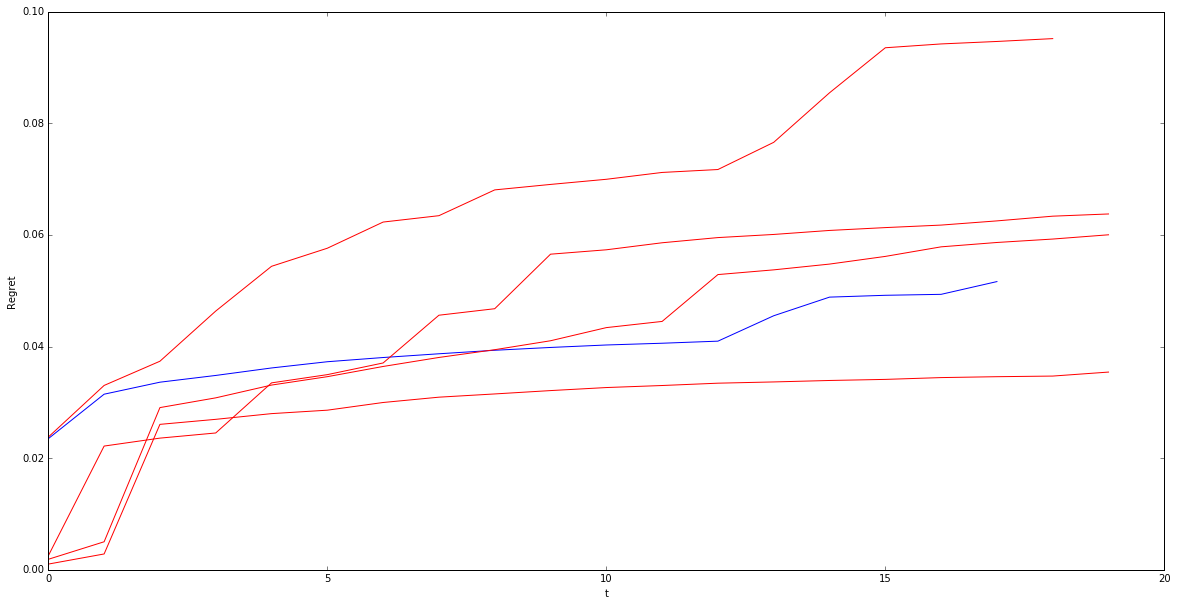

In [10]:
plt.figure(figsize=(20,10))
plt.plot(DLB_1)
plt.plot(EXP3_1, 'r')
plt.plot(EXP3_2, 'r')
plt.plot(EXP3_3, 'r')
plt.plot(EXP3_4, 'r')
plt.xlabel('t')
plt.ylabel('Regret')
plt.show()